<a href="https://colab.research.google.com/github/lala991204/DL-self-study/blob/master/tf12_5_rnn_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[[0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]
 [0.13503702 0.12893923 0.13850679 0.18323922 0.12107173]
 [0.12220255 0.12138537 0.12372168 0.16807385 0.11480508]] -> [0.08319064]
[[0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]
 [0.13503702 0.12893923 0.13850679 0.18323922 0.12107173]
 [0.12220255 0.12138537 0.12372168 0.16807385 0.11480508]
 [0.09611997 0.09773711 0.09973633 0.18754145 0.08319064]] -> [0.08660558]
[[0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


16/16 [==============================] - 2s 5ms/step - loss: 0.0161
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 3/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 4/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 5/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 7/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 8/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 9/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 10/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 11/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 12/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 13/500
16/16 [=============================

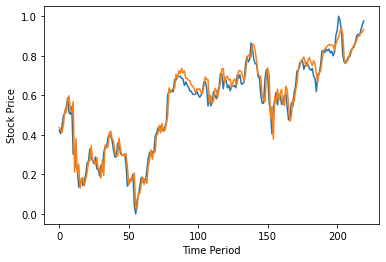

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


# train Parameters
seq_length = 7    # 7일간의 데이터로 8일째 되는 날 예측함
data_dim = 5      # feature data가 5개(open,close,volume,high,low)
output_dim = 1    # 8일째 되는 날 close 예측
learning_rate = 0.01
iterations = 500

# Open, High, Low, Volume, Close
xy = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/github/DL-self-study/data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

# train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        x = time_series[i:i + seq_length, :]
        y = time_series[i + seq_length, [-1]]    # Next close price
        print(x, "->", y)
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

print(trainX.shape)  # (505, 7, 5)   # 505개의 batch, 7개의 sequence, 5개의 input dim
print(trainY.shape)

tf.model = tf.keras.Sequential();
tf.model.add(tf.keras.layers.LSTM(units=1, input_shape=(seq_length, data_dim)))
tf.model.add(tf.keras.layers.Dense(units=output_dim, activation='tanh'))
tf.model.summary()

tf.model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=learning_rate))
tf.model.fit(trainX, trainY, epochs=iterations)


# Test step
test_predict = tf.model.predict(testX)

# Plot predictions
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()